In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("HR_comma_sep.csv",encoding ='utf-8')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
#CLEANING DATA
def reading_cleaning(df):
    df.drop_duplicates(inplace=True)
    cols = df.columns.tolist()
    df.columns = [x.lower() for x in  cols]
    return df

df = reading_cleaning(df)
df.head()    

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [42]:
def employee_important_info(df):
    average_satisfaction  = df['satisfaction_level'].mean()
    department_satisfaction = np.round(df.groupby('department')['satisfaction_level'].mean(),2)
    salary_satisfaction = df.groupby('salary')['satisfaction_level'].mean()
    left_employees   = len(df[df['left']==1])
    stayed_employees   = len(df[df['left']==0])

    return average_satisfaction ,  department_satisfaction , salary_satisfaction , left_employees ,  stayed_employees
    

    

In [43]:
average_satisfaction ,  department_satisfaction , salary_satisfaction , left_employees ,  stayed_employees  = employee_important_info(df)

In [44]:
print("Average Satisfaction Level:", average_satisfaction)
print("Department-wise Average Satisfaction Level:\n", department_satisfaction)
print("Salary-wise Average Satisfaction Level:\n", salary_satisfaction)
print("Employees who left:\n", left_employees)
print("Employees who stayed:\n", stayed_employees)

Average Satisfaction Level: 0.6025083272990586
Department-wise Average Satisfaction Level:
 department
IT             0.60
RandD          0.61
accounting     0.58
hr             0.60
management     0.60
marketing      0.61
product_mng    0.61
sales          0.60
support        0.61
technical      0.60
Name: satisfaction_level, dtype: float64
Salary-wise Average Satisfaction Level:
 salary
h         0.240000
high      0.627799
low       0.592670
medium    0.610444
Name: satisfaction_level, dtype: float64
Employees who left:
 1991
Employees who stayed:
 4914


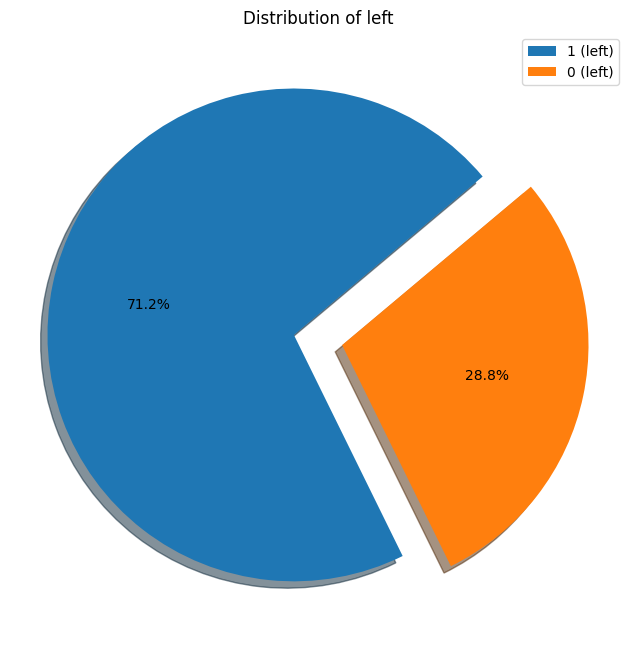

In [31]:
#Pie plot for employee different feature
def plots(df,col):
    values  =  df[col].unique()
    plt.figure(figsize=(15,8))
    explode = [0.1 if len(values) > 1 else 0]*len(values)
    plt.pie(df[col].value_counts(),explode = explode,startangle = 40 ,autopct ='%1.1f%%',shadow= True)
    labels = [f'{value} ({col})'  for value in values]
    plt.legend(labels = labels , loc ='upper right')
    plt.title(f"Distribution of {col}")
    plt.show()

plots(df , 'left')

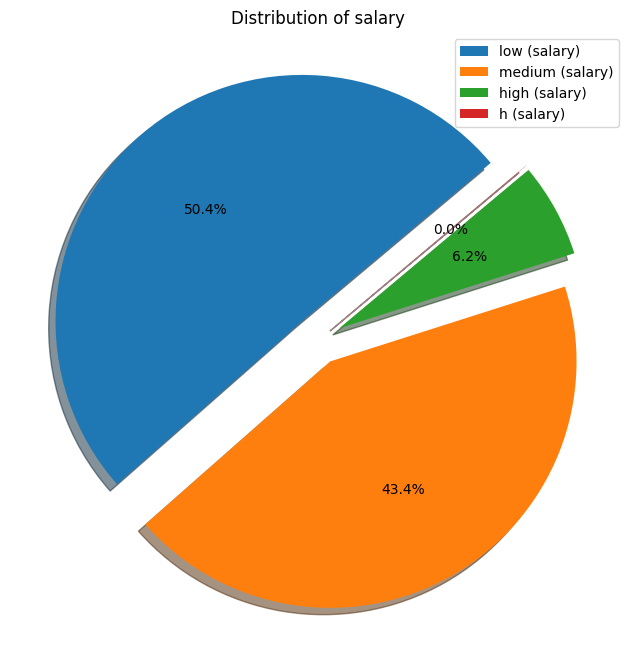

In [32]:
plots(df ,'salary')

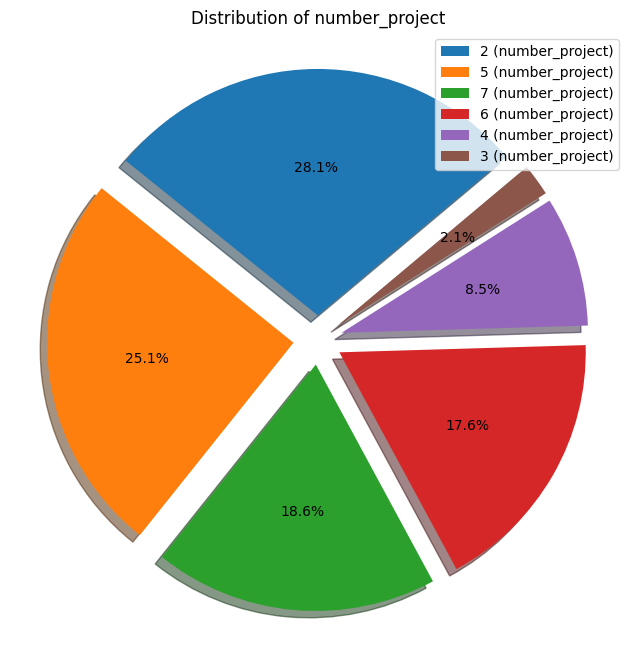

In [33]:
plots(df,'number_project')

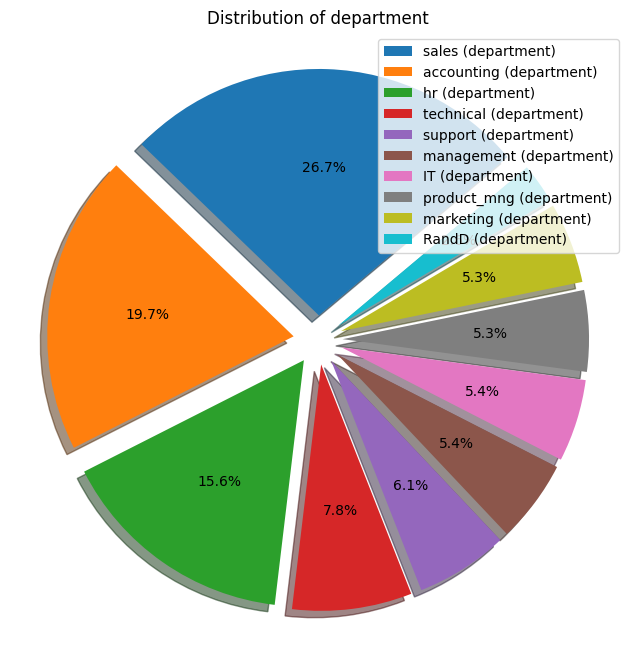

In [34]:
plots(df,'department')

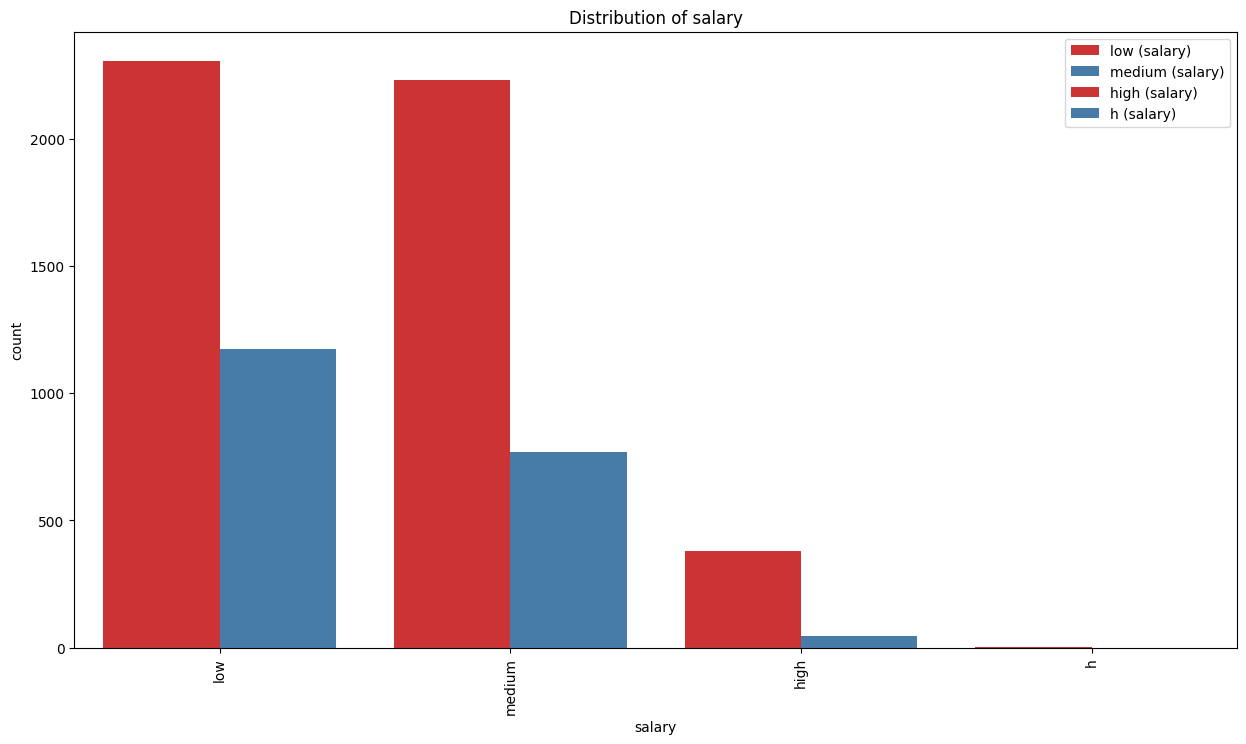

In [35]:
def distribution(df,col):
    values  =  df[col].unique()
    plt.figure(figsize=(15,8))
    sns.countplot(x=df[col],hue='left' ,palette ='Set1',data=df)
    labels = [f'{value} ({col})'  for value in values]
    plt.legend(labels = labels , loc ='upper right')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()
distribution(df ,'salary')    

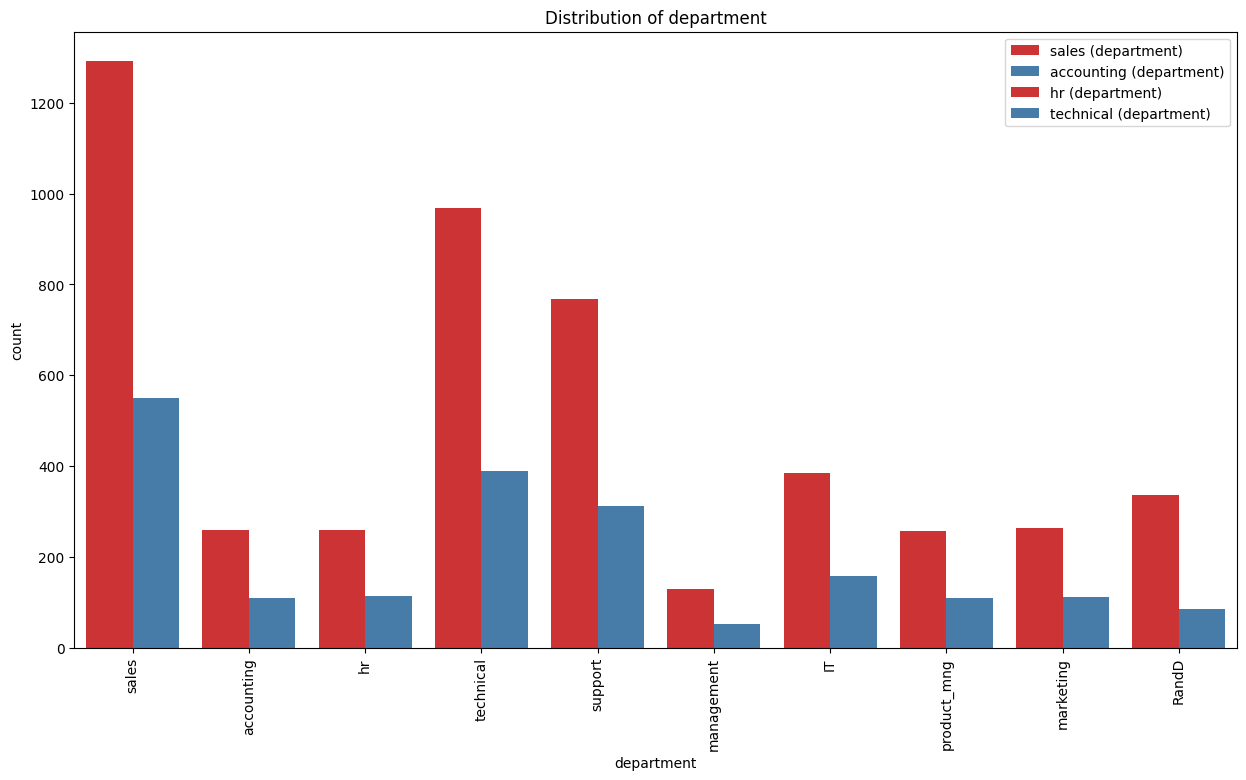

In [36]:
distribution(df,'department')

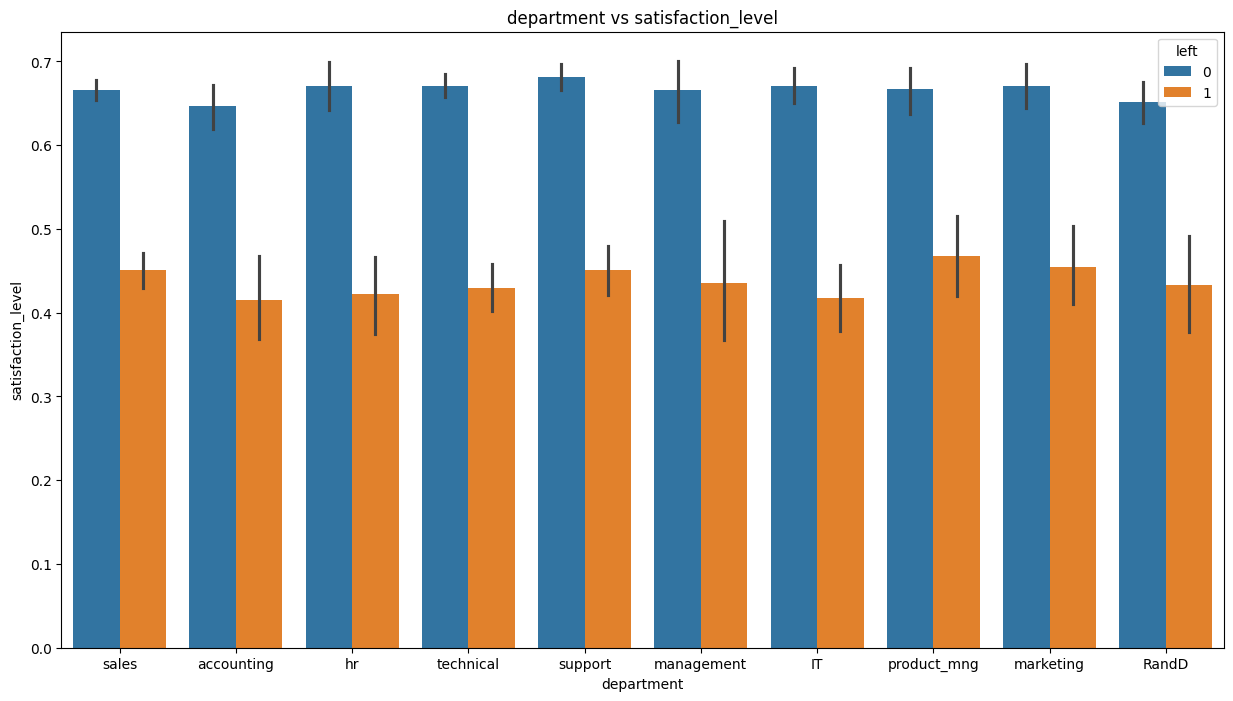

In [38]:
def comparison(df ,x,y):
    plt.figure(figsize=(15,8))
    sns.barplot(x=x,y=y,hue='left',data = df)
    plt.title(f'{x} vs {y}')
    plt.show()
    
comparison(df , 'department' , 'satisfaction_level')    

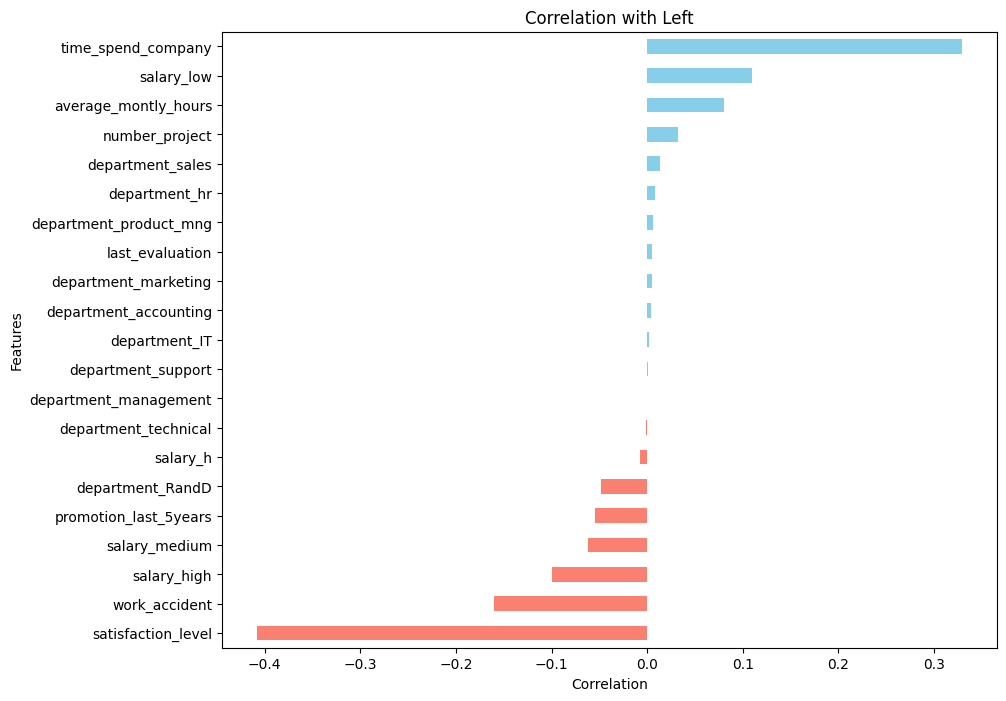

In [40]:
def corr_with_left(df):
    df_encoded = pd.get_dummies(df)
    correlations = df_encoded.corr()['left'].sort_values()[:-1]
    colors = ['skyblue' if corr>=0 else 'salmon' for corr in correlations]
    plt.figure(figsize=(10,8))
    correlations.plot(kind='barh', color=colors)
    # Add title and labels
    plt.title('Correlation with Left')
    plt.xlabel('Correlation')
    plt.ylabel('Features')

    # Show the plot
    plt.show()
corr_with_left(df)

/var/folders/yt/sm3gjlm93vn7zlt9bytr11nm0000gp/T/ipykernel_74144/160058733.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='satisfaction_level', y='last_evaluation', hue='left', shade=True, ax=axes[1])


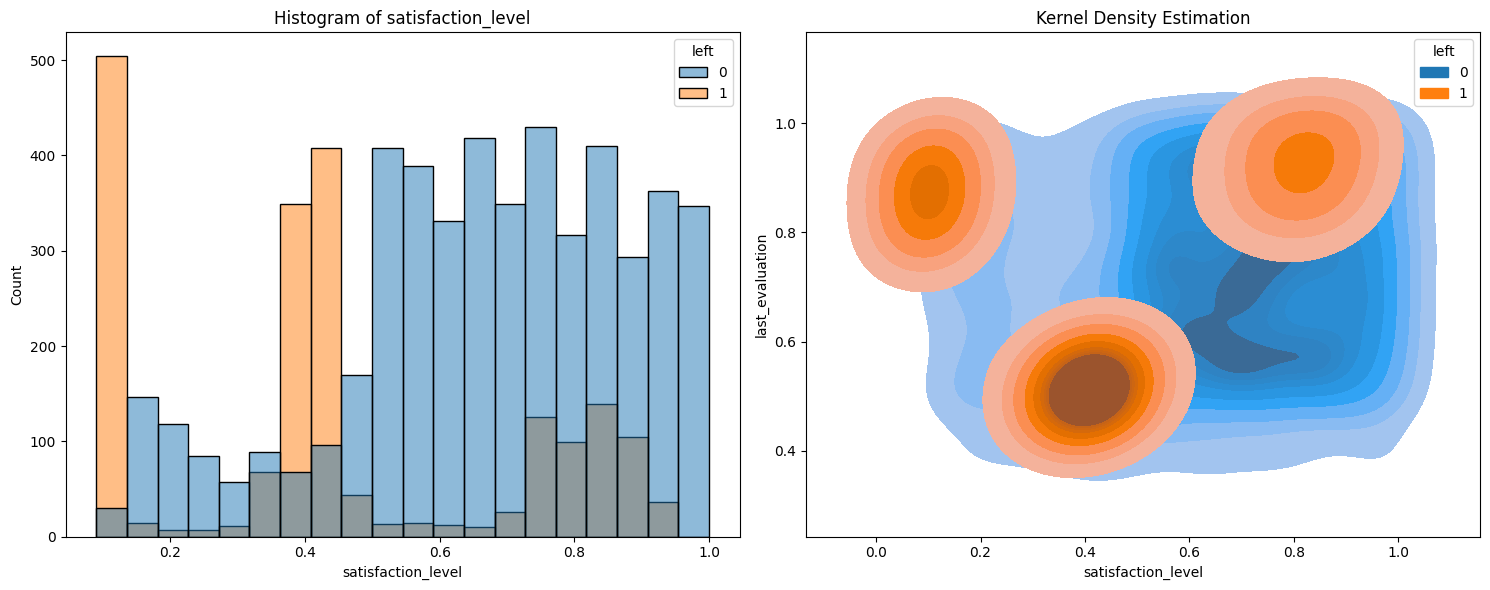

In [41]:
def histogram(df, col):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Create a grid of 1 row and 2 columns

    # Plot the first histogram
    sns.histplot(data=df, x=col, hue='left', bins=20, ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")

    # Plot the second histogram
    sns.kdeplot(data=df, x='satisfaction_level', y='last_evaluation', hue='left', shade=True, ax=axes[1])
    axes[1].set_title("Kernel Density Estimation")

    plt.tight_layout()  # Adjust the layout to prevent overlapping
    plt.show()

histogram(df, 'satisfaction_level')